# Importing libraries and files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
Lead_File=pd.read_csv("Leads.csv")

# File validation

In [4]:
Lead_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_File.shape

(9240, 37)

In [6]:
Lead_File.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
Lead_File.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
100*(Lead_File.isnull().sum()/Lead_File.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Drop columns with null values above 40%

In [9]:
to_drop=["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]
for x in to_drop:
    Lead_File.drop(x,axis=1,inplace=True)
    

In [10]:
100*(Lead_File.isnull().sum()/Lead_File.shape[0])

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
Lead_File.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


# Checking duplicate

In [12]:
sum(Lead_File.duplicated(subset='Prospect ID'))

0

# Data Cleaning

In [13]:
Lead_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
Lead_File["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [15]:
Lead_File["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### imputing null and merging the values which has very less values in a single category

In [16]:
# Imputing Null with 'Others'
Lead_File["Lead Source"] = Lead_File["Lead Source"].replace(np.nan, "Others")

# Merging lead source which are low in numbers to 'Others'
Lead_File['Lead Source'] = Lead_File['Lead Source'].replace(['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Others')

In [17]:
Lead_File["Lead Source"].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                64
Facebook              55
Name: Lead Source, dtype: int64

In [18]:
Lead_File["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [19]:
Lead_File["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [20]:
Lead_File["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [21]:
Lead_File["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [22]:
#imputing missing values of total visits to median
Total_Visits_median = Lead_File["TotalVisits"].median()
Lead_File["TotalVisits"].fillna(Total_Visits_median, inplace=True)

In [23]:
#imputing missing values of pages views per visit to median
Total_Visits_median = Lead_File["Page Views Per Visit"].median()
Lead_File["Page Views Per Visit"].fillna(Total_Visits_median, inplace=True)

In [24]:
Lead_File["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
#imputing missing values of last activity views per visit to mode
Last_Activity_mode = Lead_File["Last Activity"].mode()[0]
Lead_File["Last Activity"].fillna(Last_Activity_mode, inplace=True)

In [26]:
# Merging lead source which are low in numbers to 'Others'
Lead_File["Last Activity"] = Lead_File["Last Activity"].replace(["Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"], 'Others')

In [27]:
Lead_File["Last Activity"].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [28]:
Lead_File['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [29]:
Lead_File["Tags"] = Lead_File["Tags"].replace(np.nan, "Others")
Lead_File["Tags"] = Lead_File["Tags"].replace(["switched off", "Busy", "Lost to EINS", "Not doing further education", "Interested  in full time MBA",
                                     "Graduation in progress", "invalid number", "Diploma holder (Not Eligible)", "wrong number given", "opp hangup",
                                     "number not provided", "in touch with EINS", "Lost to Others", "Want to take admission but has financial problems",
                                     "Still Thinking", "Interested in Next batch", "In confusion whether part time or DLP", "Lateral student",
                                     "Shall take in the next coming month", "University not recognized", "Recognition issue (DEC approval)","Closed by Horizzon"
                                     ], "Others")

In [30]:
Lead_File["Tags"].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [31]:
Lead_File["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [32]:
Lead_File["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### imputing null and changing select to different category as others

In [33]:
Lead_File["Specialization"] = Lead_File["Specialization"].replace(np.nan, "Others")
Lead_File['Specialization'] = Lead_File['Lead Source'].replace(['Select'], 'Others')

In [34]:
Lead_File["Specialization"].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                64
Facebook              55
Name: Specialization, dtype: int64

In [35]:
Lead_File["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
Lead_File["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
Lead_File["What is your current occupation"]=Lead_File["What is your current occupation"].replace(np.nan,"Other")

In [38]:
Lead_File["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
Lead_File["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [40]:
Lead_File["Magazine"].value_counts()

No    9240
Name: Magazine, dtype: int64

In [41]:
Lead_File["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [42]:
Lead_File["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [43]:
Lead_File["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [44]:
Lead_File["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [45]:
Lead_File["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [46]:
Lead_File["Receive More Updates About Our Courses"].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [47]:
Lead_File["Update me on Supply Chain Content"].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [48]:
Lead_File["Get updates on DM Content"].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [49]:
Lead_File["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [50]:
Lead_File["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [51]:
Lead_File["I agree to pay the amount through cheque"].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [52]:
Lead_File["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [53]:
Lead_File["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [54]:
# Imputing Null with 'Others'
Lead_File["Last Notable Activity"] = Lead_File["Last Notable Activity"].replace(np.nan, "Others")

# Merging lead source which are low in numbers to 'Others'
Lead_File["Last Notable Activity"] = Lead_File["Last Notable Activity"].replace(["Unreachable","Had a Phone Conversation","Resubscribed to emails","Email Marked Spam","Approached upfront","View in browser link Clicked","Form Submitted on Website","Email Received"], 'Others')

In [55]:
Lead_File["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Others                       53
Unsubscribed                 47
Name: Last Notable Activity, dtype: int64

### drop the columns due to high skewness or single value

In [56]:
col=["Do Not Call","Country","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","Lead Profile","City","How did you hear about X Education","I agree to pay the amount through cheque"]
for i  in col:
    Lead_File.drop(i,axis=1,inplace=True)

In [57]:
#drop Prospect ID  and  Lead Number as unique identifier is not needed
Lead_File.drop("Prospect ID",axis=1,inplace=True)
Lead_File.drop("Lead Number",axis=1,inplace=True)

In [58]:
Lead_File.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

# Data Visualization

## Univariate and bivariate analysis

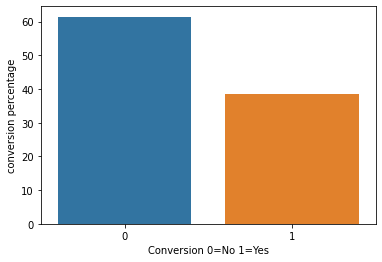

In [59]:
## Percentage of Converted data
data=sns.barplot(x='Converted', y='Converted', data=Lead_File, estimator=lambda x: len(x) / len(Lead_File) * 100)
plt.xlabel('Conversion 0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('conversion percentage')
plt.show()

* conversions were less as compared to non conversions

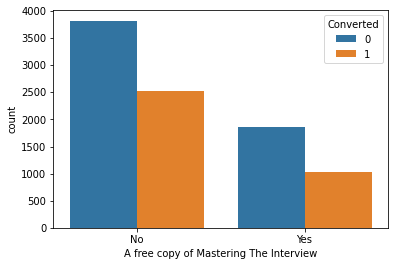

In [60]:
## column "A free copy of Mastering The Interview" 
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_File)
plt.show()

* "A free copy of Mastering The Interview" most of the data was not converted

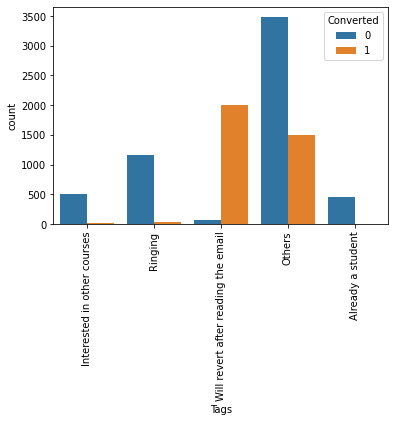

In [61]:
## column "Tags" 
sns.countplot(x = "Tags", hue = "Converted", data = Lead_File)
plt.xticks(rotation = 90)
plt.show()

* Most conversions have happened under the tag "I will revert after reading the email"

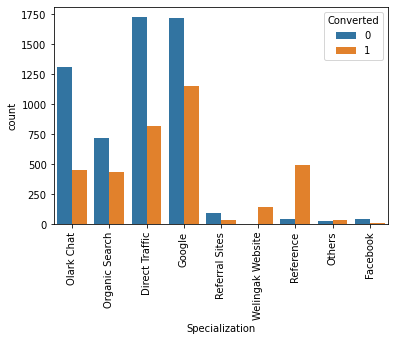

In [62]:
## column "Specialization" 
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_File)
plt.xticks(rotation = 90)
plt.show()

* most of the data was collected from "Direct Traffic" and "Google" and conversions have happened on the same

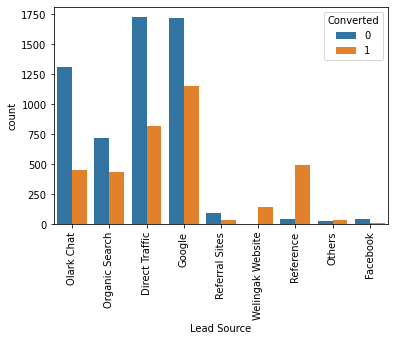

In [63]:
## column "Lead Source"
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_File)
plt.xticks(rotation = 90)
plt.show()

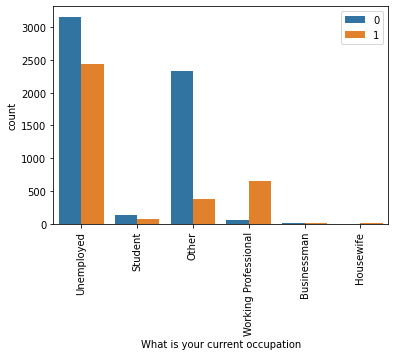

In [64]:
## column "What is your current occupation"
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_File)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

* Most of the conversions have happened for working professionnal and unemployed

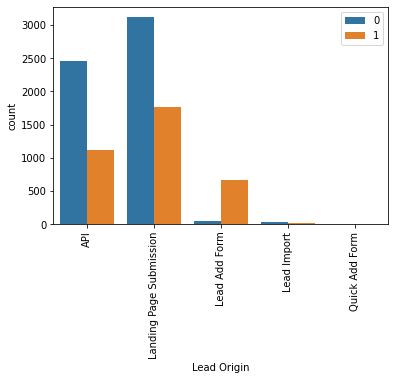

In [65]:
## columns "Lead Origin" count
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_File)
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.show()

* most of the "Lead Add Form" "Lead origin" was converted 
* most of the API and "Landing page submission",  "Lead origin" were not converted

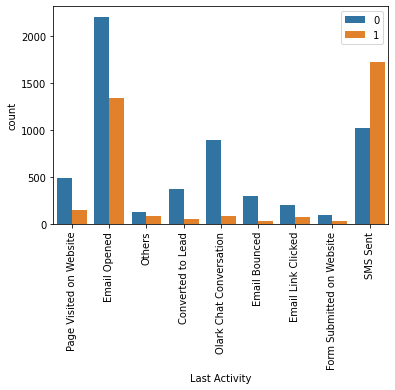

In [66]:
## columns "Last Activity" count
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_File)
plt.xticks(rotation=90)
plt.legend(loc = 'best')
plt.show()

* most of the sms sent "LastActivity" was converted 
* most of the "Email opened"  "LastActivity" was not converted

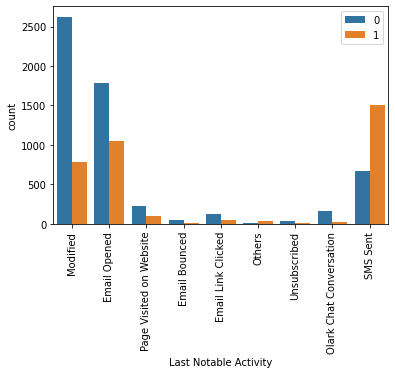

In [67]:
## column "Last Notable Activity" 
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_File)
plt.xticks(rotation=90)
plt.legend(loc = 'best')
plt.show() 

* most of the sms sent "Last notable Activity" was converted 
* most of the modified  "Last notable Activity" was not converted

### Heatmap of numerical columns

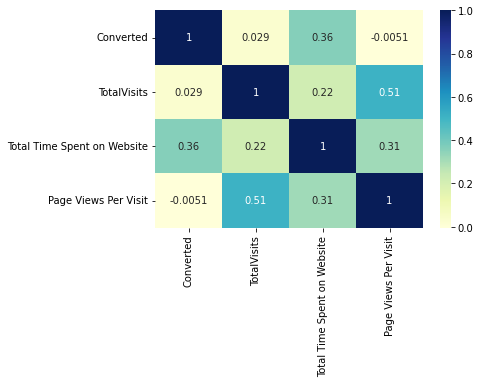

In [68]:
sns.heatmap(Lead_File.corr(),cmap="YlGnBu", annot=True)
plt.show()

* good correlation is present between pages per visit and totalvisits
* good correlation is present between converted and total time spent on website
* conversion and pages views per visit have not good correlation

## Numerical outlier Treatment

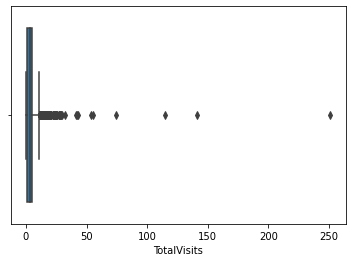

In [69]:
sns.boxplot(Lead_File["TotalVisits"])
plt.show()

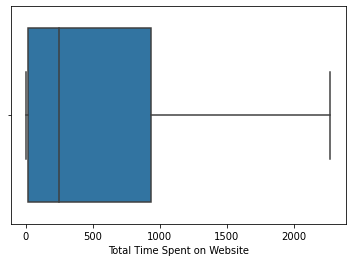

In [70]:
sns.boxplot(Lead_File["Total Time Spent on Website"])
plt.show()

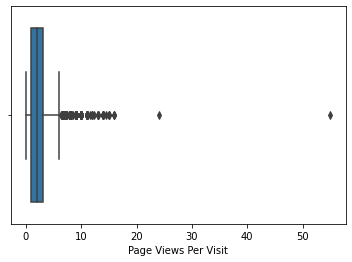

In [71]:
sns.boxplot(Lead_File["Page Views Per Visit"])
plt.show()

In [72]:
def outliers(cols):
    Q1 = Lead_File[cols].quantile(0.25)
    Q3 = Lead_File[cols].quantile(0.75)
    IQR = Q3 - Q1
    lowerwhisker=(Q1 - 1.5 * IQR)
    upperwhisker=(Q3 + 1.5 * IQR)
    print("the values greater than {} can be considered as the outlier in the upper level for column {} and can be capped".format(upperwhisker,cols) )

In [73]:
outliers("TotalVisits")

the values greater than 11.0 can be considered as the outlier in the upper level for column TotalVisits and can be capped


In [74]:
outliers("Page Views Per Visit")

the values greater than 6.0 can be considered as the outlier in the upper level for column Page Views Per Visit and can be capped


* capping the outliers instead of dropping the data

In [75]:
Lead_File.loc[Lead_File['TotalVisits'] > 11, 'TotalVisits'] = 6
Lead_File.loc[Lead_File['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

In [76]:
Lead_File["TotalVisits"].max()

11.0

In [77]:
Lead_File["Page Views Per Visit"].max()

6.0

## Dummy variable creation

In [78]:
dummy_Lead_File_columns = Lead_File.loc[:, Lead_File.dtypes == 'object']
dummy_Lead_File_columns.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [79]:
# Create dummy variables using the 'get_dummies' command
dummy_Lead_File = pd.get_dummies(Lead_File[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity'
       , 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_File = pd.concat([Lead_File, dummy_Lead_File], axis=1)

In [80]:
dummy_Specialization = pd.get_dummies(Lead_File['Specialization'], prefix = 'Specialization')
dummy_Specialization = dummy_Specialization.drop(['Specialization_Others'], 1)
Lead_File = pd.concat([Lead_File, dummy_Specialization], axis=1)

In [81]:
Lead_File = Lead_File.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [82]:
Lead_File.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Direct Traffic,Specialization_Facebook,Specialization_Google,Specialization_Olark Chat,Specialization_Organic Search,Specialization_Reference,Specialization_Referral Sites,Specialization_Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [83]:
X = Lead_File.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Direct Traffic,Specialization_Facebook,Specialization_Google,Specialization_Olark Chat,Specialization_Organic Search,Specialization_Reference,Specialization_Referral Sites,Specialization_Welingak Website
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [84]:
y = Lead_File['Converted']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [86]:
X_train.shape

(6468, 50)

In [87]:
X_test.shape

(2772, 50)

In [88]:
y_train.shape

(6468,)

In [89]:
y_test.shape

(2772,)

In [90]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Direct Traffic,Specialization_Facebook,Specialization_Google,Specialization_Olark Chat,Specialization_Organic Search,Specialization_Reference,Specialization_Referral Sites,Specialization_Welingak Website
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6795,0.363636,0.214349,0.221667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3516,0.454545,0.046655,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8105,0.454545,0.541373,0.833333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:
X_train.shape

(6468, 50)

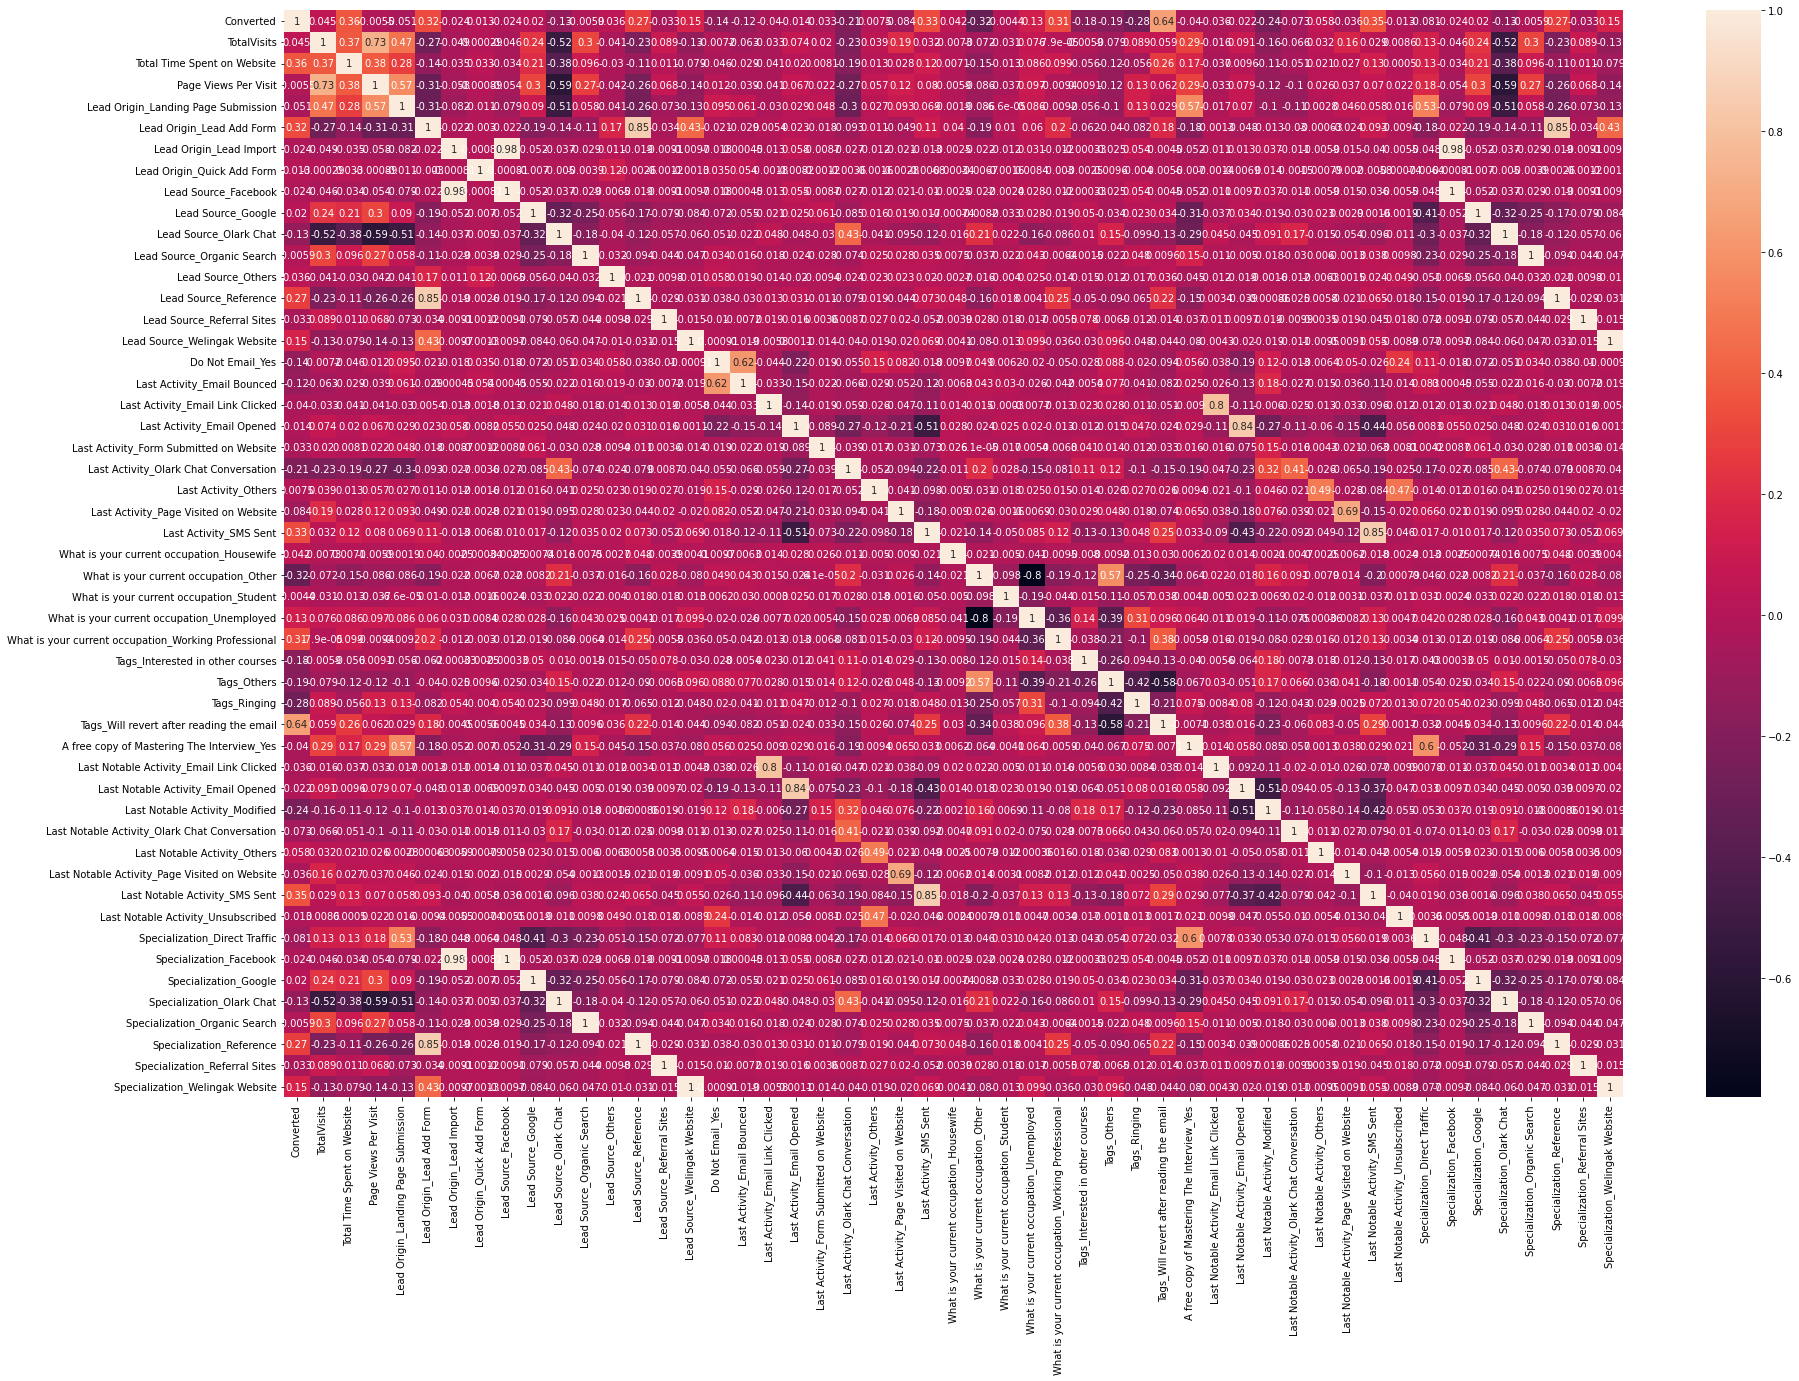

In [92]:
# Looking at the correlation table
plt.figure(figsize = (30,20))
sns.heatmap(Lead_File.corr(),annot=True)
plt.show()

In [93]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15).fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Facebook', False, 7),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', False, 23),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Others', False, 34),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Others', False, 5),
 ('Last Activity_Page Visited on Website', False, 33),
 ('Last Activity_SMS Se

## selecting 15 columns 

In [94]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Specialization_Welingak Website'],
      dtype='object')

In [95]:
X_train=X_train[col]

In [96]:
X_train.shape

(6468, 15)

In [97]:
X_train = sm.add_constant(X_train)
m1 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
model_1 = m1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.9
Date:                Tue, 14 Jun 2022   Deviance:                       3223.8
Time:                        10:41:55   Pearson chi2:                 9.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3735      0.327    -13.382      0.000      -5.014      -3.733
Total Time Spent on Website                              4.3473      0.209     20.790      0.000       3.937       4.757
Page Views Per Visit                                    -1.7899      0.203     -8.817      0.000      -2.188      -1.392
Lead Origin_Lead Add Form                                2.3989      0.249      9.637      0.000       1.911       2.887
Lead Source_Welingak Website                             0.8705      0.381      2.286      0.022       0.124       1.617
Do Not Email_Yes                                        -1.3733      0.217     -6.343      0.000      -1.798      -0.949
Last Activity_Email Opened                               1.2323      0.185      6.655      0.000       0.869       1.595
Last Activity_SMS Sent                                   1.6227      0.133     12.200      0.000       1.362       1.883
What is your current occupation_Other                   -1.2566      0.102    -12.282      0.000      -1.457      -1.056
What is your current occupation_Working Professional     1.2864      0.266      4.835      0.000       0.765       1.808
Tags_Others                                              3.3908      0.303     11.202      0.000       2.798       3.984
Tags_Ringing                                            -0.6041      0.371     -1.628      0.103      -1.331       0.123
Tags_Will revert after reading the email                 6.7101      0.340     19.746      0.000       6.044       7.376
Last Notable Activity_Email Opened                      -1.0766      0.215     -5.016      0.000      -1.497      -0.656
Last Notable Activity_Modified                          -1.1259      0.132     -8.531      0.000      -1.385      -0.867
Specialization_Welingak Website                          0.8705      0.381      2.286      0.022       0.124       1.617
========================================================================================================================
"""

In [98]:
X_train.shape

(6468, 16)

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,inf
15,Specialization_Welingak Website,inf
0,const,17.97
13,Last Notable Activity_Email Opened,5.47
6,Last Activity_Email Opened,4.31
10,Tags_Others,3.45
12,Tags_Will revert after reading the email,3.09
14,Last Notable Activity_Modified,2.12
11,Tags_Ringing,2.10
7,Last Activity_SMS Sent,2.04


* dropping "Last Notable Activity_Email Opened" due to high vif

In [100]:
X_train.drop("Last Notable Activity_Email Opened",axis=1,inplace=True)

In [101]:
X_train.shape

(6468, 15)

In [102]:
X_train = sm.add_constant(X_train)
m2 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
model_2 = m2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.3
Date:                Tue, 14 Jun 2022   Deviance:                       3248.5
Time:                        10:41:55   Pearson chi2:                 8.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5627
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6196      0.323    -14.315      0.000      -5.252      -3.987
Total Time Spent on Website                              4.3700      0.208     20.977      0.000       3.962       4.778
Page Views Per Visit                                    -1.7919      0.202     -8.871      0.000      -2.188      -1.396
Lead Origin_Lead Add Form                                2.5204      0.248     10.157      0.000       2.034       3.007
Lead Source_Welingak Website                             0.8379      0.381      2.200      0.028       0.091       1.584
Do Not Email_Yes                                        -1.3532      0.216     -6.267      0.000      -1.776      -0.930
Last Activity_Email Opened                               0.5414      0.127      4.249      0.000       0.292       0.791
Last Activity_SMS Sent                                   1.7647      0.130     13.522      0.000       1.509       2.020
What is your current occupation_Other                   -1.2894      0.102    -12.669      0.000      -1.489      -1.090
What is your current occupation_Working Professional     1.2876      0.267      4.829      0.000       0.765       1.810
Tags_Others                                              3.4001      0.301     11.279      0.000       2.809       3.991
Tags_Ringing                                            -0.5913      0.369     -1.602      0.109      -1.315       0.132
Tags_Will revert after reading the email                 6.6750      0.338     19.730      0.000       6.012       7.338
Last Notable Activity_Modified                          -0.7405      0.106     -6.957      0.000      -0.949      -0.532
Specialization_Welingak Website                          0.8379      0.381      2.200      0.028       0.091       1.584
========================================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,inf
14,Specialization_Welingak Website,inf
0,const,16.38
10,Tags_Others,3.45
12,Tags_Will revert after reading the email,3.08
11,Tags_Ringing,2.10
6,Last Activity_Email Opened,1.90
7,Last Activity_SMS Sent,1.89
8,What is your current occupation_Other,1.62
3,Lead Origin_Lead Add Form,1.51


* dropping "Lead Source_Welingak Website" as vif is infinity

In [104]:
X_train.drop("Lead Source_Welingak Website",axis=1,inplace=True)

In [105]:
X_train.shape

(6468, 14)

In [106]:
X_train = sm.add_constant(X_train)
m3 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
model_3 = m3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1624.3
Date:                Tue, 14 Jun 2022   Deviance:                       3248.5
Time:                        10:41:55   Pearson chi2:                 8.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5627
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.6196      0.323    -14.315      0.000      -5.252      -3.987
Total Time Spent on Website                              4.3700      0.208     20.977      0.000       3.962       4.778
Page Views Per Visit                                    -1.7919      0.202     -8.871      0.000      -2.188      -1.396
Lead Origin_Lead Add Form                                2.5204      0.248     10.157      0.000       2.034       3.007
Do Not Email_Yes                                        -1.3532      0.216     -6.267      0.000      -1.776      -0.930
Last Activity_Email Opened                               0.5414      0.127      4.249      0.000       0.292       0.791
Last Activity_SMS Sent                                   1.7647      0.130     13.522      0.000       1.509       2.020
What is your current occupation_Other                   -1.2894      0.102    -12.669      0.000      -1.489      -1.090
What is your current occupation_Working Professional     1.2876      0.267      4.829      0.000       0.765       1.810
Tags_Others                                              3.4001      0.301     11.279      0.000       2.809       3.991
Tags_Ringing                                            -0.5913      0.369     -1.602      0.109      -1.315       0.132
Tags_Will revert after reading the email                 6.6750      0.338     19.730      0.000       6.012       7.338
Last Notable Activity_Modified                          -0.7405      0.106     -6.957      0.000      -0.949      -0.532
Specialization_Welingak Website                          1.6757      0.762      2.200      0.028       0.183       3.169
========================================================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.38
9,Tags_Others,3.45
11,Tags_Will revert after reading the email,3.08
10,Tags_Ringing,2.10
5,Last Activity_Email Opened,1.90
6,Last Activity_SMS Sent,1.89
7,What is your current occupation_Other,1.62
3,Lead Origin_Lead Add Form,1.51
12,Last Notable Activity_Modified,1.41
2,Page Views Per Visit,1.33


* dropping "Tags_Ringing" as probability was greater than 0.05

In [108]:
X_train.drop("Tags_Ringing",axis=1,inplace=True)

In [109]:
X_train.shape

(6468, 13)

In [110]:
X_train = sm.add_constant(X_train)
m4 = sm.GLM(y_train,X_train,family=sm.families.Binomial())
model_4 = m4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1625.5
Date:                Tue, 14 Jun 2022   Deviance:                       3251.0
Time:                        10:41:55   Pearson chi2:                 8.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5625
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0238      0.225    -22.335      0.000      -5.465      -4.583
Total Time Spent on Website                              4.3656      0.208     20.962      0.000       3.957       4.774
Page Views Per Visit                                    -1.7958      0.202     -8.900      0.000      -2.191      -1.400
Lead Origin_Lead Add Form                                2.4940      0.246     10.126      0.000       2.011       2.977
Do Not Email_Yes                                        -1.3482      0.216     -6.252      0.000      -1.771      -0.926
Last Activity_Email Opened                               0.5488      0.127      4.306      0.000       0.299       0.799
Last Activity_SMS Sent                                   1.7487      0.130     13.443      0.000       1.494       2.004
What is your current occupation_Other                   -1.2889      0.102    -12.680      0.000      -1.488      -1.090
What is your current occupation_Working Professional     1.3067      0.269      4.858      0.000       0.780       1.834
Tags_Others                                              3.8052      0.192     19.848      0.000       3.429       4.181
Tags_Will revert after reading the email                 7.0768      0.248     28.537      0.000       6.591       7.563
Last Notable Activity_Modified                          -0.7297      0.106     -6.864      0.000      -0.938      -0.521
Specialization_Welingak Website                          1.6990      0.761      2.232      0.026       0.207       3.191
========================================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.51
9,Tags_Others,2.10
10,Tags_Will revert after reading the email,1.96
5,Last Activity_Email Opened,1.90
6,Last Activity_SMS Sent,1.86
7,What is your current occupation_Other,1.62
3,Lead Origin_Lead Add Form,1.51
11,Last Notable Activity_Modified,1.38
2,Page Views Per Visit,1.32
1,Total Time Spent on Website,1.29


## Creating prediction

In [112]:
y_train_pred = model_4.predict(sm.add_constant(X_train))

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.011262
1,0,0.467017
2,0,0.006564
3,0,0.082554
4,0,0.197890


In [115]:
y_train_pred_final['Predicted'] = y_train_pred_final["Conversion_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.011262,0
1,0,0.467017,0
2,0,0.006564,0
3,0,0.082554,0
4,0,0.197890,0


## Model evaluation

In [116]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"] )
confusion_mat

array([[3751,  251],
       [ 430, 2036]])

-- Predicted     not_churn    churn
-- Actual
-- not_churn        3403       492
-- churn             729      1727

In [117]:
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])

0.8947124304267161

In [118]:
TP = confusion_mat[1,1]
TN = confusion_mat[0,0]
FP = confusion_mat[0,1] 
FN = confusion_mat[1,0]

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / (TP+FN)

0.8256285482562855

In [120]:
# Let us calculate specificity
TN / (TN+FP)

0.9372813593203398

In [121]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06271864067966017


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.890249234805422


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8971537909591006


## plotting ROC

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"], drop_intermediate = False )

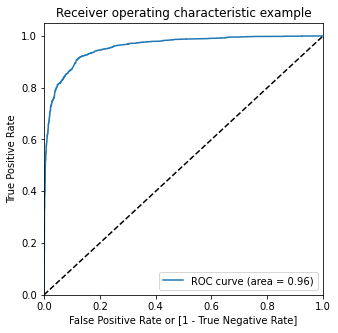

In [126]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"])

## Finding Optimal Cutoff Point

In [127]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Conversion_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011262,0,1,0,0,0,0,0,0,0,0,0
1,0,0.467017,0,1,1,1,1,1,0,0,0,0,0
2,0,0.006564,0,1,0,0,0,0,0,0,0,0,0
3,0,0.082554,0,1,0,0,0,0,0,0,0,0,0
4,0,0.197890,0,1,1,0,0,0,0,0,0,0,0


In [128]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.782313,0.973642,0.664418
0.2,0.2,0.866419,0.937551,0.822589
0.3,0.3,0.891156,0.912409,0.878061
0.4,0.4,0.893321,0.854015,0.917541
0.5,0.5,0.894712,0.825629,0.937281
0.6,0.6,0.894867,0.793593,0.957271
0.7,0.7,0.884199,0.741281,0.972264
0.8,0.8,0.868738,0.687753,0.980260
0.9,0.9,0.846011,0.615166,0.988256


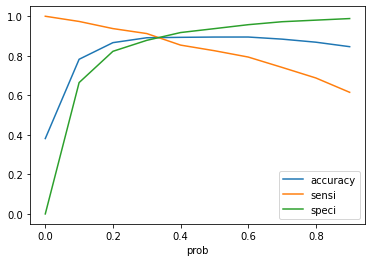

In [129]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* select cutoff as 0.3

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Conversion_Prob"].map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011262,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.467017,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.006564,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.082554,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.197890,0,1,1,0,0,0,0,0,0,0,0,0


In [131]:
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.891156462585034

In [132]:
confusion_mat_2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"] )
confusion_mat_2

array([[3514,  488],
       [ 216, 2250]])

In [133]:
TP = confusion_mat_2[1,1]
TN = confusion_mat_2[0,0]
FP = confusion_mat_2[0,1] 
FN = confusion_mat_2[1,0]

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9124087591240876

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8780609695152424

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12193903048475763


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.8217677136596055


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9420911528150134


## Test set prediction

In [139]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [140]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Specialization_Direct Traffic,Specialization_Facebook,Specialization_Google,Specialization_Olark Chat,Specialization_Organic Search,Specialization_Reference,Specialization_Referral Sites,Specialization_Welingak Website
4269,0.727273,0.448735,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7766,0.454545,0.026187,0.833333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [141]:
X_train.columns

Index(['const', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Specialization_Welingak Website'],
      dtype='object')

In [142]:
X_test = X_test[[ 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Specialization_Welingak Website']]

In [143]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Email Opened,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Working Professional,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Specialization_Welingak Website
4269,1.0,0.448735,0.500000,0,0,0,1,1,0,1,0,0,0
2376,1.0,0.000000,0.000000,1,0,0,1,0,0,0,1,0,0
7766,1.0,0.026187,0.833333,0,0,0,0,0,1,0,1,0,0
9199,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0
4359,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0


In [144]:
X_test.shape

(2772, 13)

In [145]:
y_test_pred = model_4.predict(X_test)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.575015
1,1,0.998159
2,1,0.878414
3,0,0.003162
4,1,0.993914


In [146]:
y_pred_final['final_predicted'] = y_pred_final["Conversion_Prob"].map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.575015,1
1,1,0.998159,1
2,1,0.878414,1
3,0,0.003162,0
4,1,0.993914,1


In [147]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final["final_predicted"])

0.8957431457431457

In [148]:
confusion_mat_3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final["final_predicted"] )
confusion_mat_3

array([[1480,  197],
       [  92, 1003]])

In [149]:
TP = confusion_mat_3[1,1]
TN = confusion_mat_3[0,0]
FP = confusion_mat_3[0,1] 
FN = confusion_mat_3[1,0]

In [150]:
# Calculating the sensitivity
TP/(TP+FN)

0.9159817351598174

In [151]:
# Calculating the specificity
TN/(TN+FP)

0.8825283243887895

## Precision-Recall

In [152]:
confusion_3 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"] )
confusion_3

array([[3751,  251],
       [ 430, 2036]])

In [153]:
TP = confusion_3[1,1]
TN = confusion_3[0,0]
FP = confusion_3[0,1] 
FN = confusion_3[1,0]

In [154]:
precesion=(TP /( TP + FP))
precesion

0.890249234805422

In [155]:
Recall = (TP /( TP + FN))
Recall

0.8256285482562855

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion_Prob"])

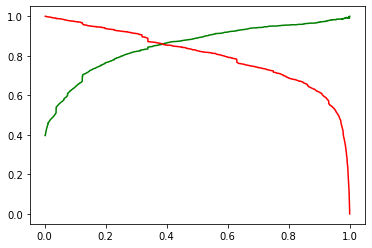

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

* taking the point of curve at .38

In [158]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Conversion_Prob"].map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011262,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.467017,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.006564,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.082554,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.197890,0,1,1,0,0,0,0,0,0,0,0,0


* Accuracy

In [159]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8928571428571429

In [160]:
confusion_4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_4

array([[3647,  355],
       [ 338, 2128]])

In [161]:
TP = confusion_4[1,1]
TN = confusion_4[0,0]
FP = confusion_4[0,1] 
FN = confusion_4[1,0]

In [162]:
Precision = (TP / (TP + FP))
Precision

0.8570277889649618

In [163]:
Recall = (TP / (TP + FN))
Recall

0.8629359286293593

# Final Test Prediction

In [164]:
y_test_pred = model_4.predict(X_test)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.575015
1,1,0.998159
2,1,0.878414
3,0,0.003162
4,1,0.993914


In [165]:
y_pred_final['final_predicted'] = y_pred_final["Conversion_Probability"].map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Probability,final_predicted
0,1,0.575015,1
1,1,0.998159,1
2,1,0.878414,1
3,0,0.003162,0
4,1,0.993914,1
5,1,0.960524,1
6,1,0.955559,1
7,1,0.935361,1
8,0,0.030220,0
9,1,0.961353,1


In [166]:
#accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final["final_predicted"])

0.8932178932178932

In [167]:
confusion_final = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final["final_predicted"])
confusion_final

array([[1525,  152],
       [ 144,  951]])

In [168]:
TP = confusion_final[1,1]
TN = confusion_final[0,0]
FP = confusion_final[0,1] 
FN = confusion_final[1,0]

In [169]:
# Recall 
TP / (TP+FN)

0.8684931506849315

In [170]:
#precision
TP / (TP + FP)

0.8621940163191296

In [171]:
#specivity
TN / (TN+FP)

0.9093619558735838

## The main variables that mattered more for the potential buyers are

* Tags_were other(even which were not specified)
* Tags was  revert after reading the email
* Last Activity was Email Opened
* Last Activity was SMS Sent
* current occupation was Others(include non specified )
* Lead Origin was  Add Form
* Last Notable Activity was Modified
* Page Views Per Vists
* Total Time Spent on Website
* Specialization was Welingak Website
* current occupation was Working Profession
* Do Not Email was Yes